In [1]:
from utils.all import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data), len(test_data)

(8982, 2246)

In [4]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [5]:
word_index = reuters.get_word_index()

In [6]:
index_word = {v:k for k,v in word_index.items()}
index_word[-3] = '_PAD_'
index_word[-2] = '_START_'
index_word[-1] = '_UNK_'

In [7]:
' '.join([index_word.get(i-3, '?') for i in train_data[0]])

'_START_ _UNK_ _UNK_ said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros([len(sequences), dimension])
    for i, sequence in enumerate(sequences):
        for s in sequence:
            result[i,s] = 1.
    return result

In [9]:
x_train, x_test = [vectorize_sequences(s) for s in [train_data, test_data]]

In [10]:
def to_one_hot(labels, dimension=46):
    result = np.zeros([len(labels), dimension])
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result

In [11]:
y_train, y_test = [to_one_hot(l) for l in [train_labels, test_labels]]

In [12]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
partial_x_train.shape

(7982, 10000)

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=[x_val, y_val]
)

Epoch 1/20
16/16 [==============================] - 2s 55ms/step - loss: 2.8271 - accuracy: 0.5395 - val_loss: 1.8090 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.4493 - accuracy: 0.7041 - val_loss: 1.2816 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.0511 - accuracy: 0.7764 - val_loss: 1.1230 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8291 - accuracy: 0.8175 - val_loss: 1.0292 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6724 - accuracy: 0.8554 - val_loss: 0.9549 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 32ms/step - loss: 0.5373 - accuracy: 0.8829 - val_loss: 0.9336 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4395 - accuracy: 0.9059 - val_loss: 0.9011 - val_accuracy: 0.8120
Epoch 8/20
16

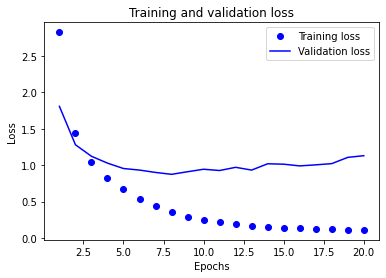

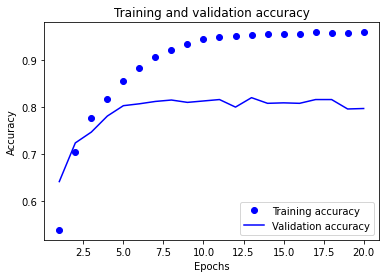

In [17]:
plot_history(history)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=9,
    validation_data=[x_val, y_val]
)

Epoch 1/9
16/16 [==============================] - 1s 41ms/step - loss: 2.6305 - accuracy: 0.5128 - val_loss: 1.7651 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 0s 29ms/step - loss: 1.4376 - accuracy: 0.7156 - val_loss: 1.2968 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 1.0417 - accuracy: 0.7810 - val_loss: 1.1105 - val_accuracy: 0.7590
Epoch 4/9
16/16 [==============================] - 0s 29ms/step - loss: 0.8089 - accuracy: 0.8269 - val_loss: 1.0094 - val_accuracy: 0.7970
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.6333 - accuracy: 0.8712 - val_loss: 0.9463 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.5062 - accuracy: 0.8963 - val_loss: 0.9113 - val_accuracy: 0.8190
Epoch 7/9
16/16 [==============================] - 1s 33ms/step - loss: 0.4016 - accuracy: 0.9188 - val_loss: 0.8950 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [27]:
a = np.unique(train_labels, return_counts=True)

In [31]:
for b in zip(a):
    print(b)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),)
(array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
        390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
         15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
         11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
         12,   18], dtype=int64),)


In [32]:
values, counts = np.unique(train_labels, return_counts=True)
for value, count in zip(values, counts):
    print(value, count)

0 55
1 432
2 74
3 3159
4 1949
5 17
6 48
7 16
8 139
9 101
10 124
11 390
12 49
13 172
14 26
15 20
16 444
17 39
18 66
19 549
20 269
21 100
22 15
23 41
24 62
25 92
26 24
27 15
28 48
29 19
30 45
31 39
32 32
33 11
34 50
35 10
36 49
37 19
38 19
39 24
40 36
41 30
42 13
43 21
44 12
45 18


Predicting 3 every time would give us an accuracy of ~35% (3159/8982)

In [40]:
predictions = model.predict(x_test[:5])

In [43]:
tf.argmax(predictions, axis=1)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 3, 10,  1,  4, 13], dtype=int64)>

if we don't want to 1-hot the labels ... `sparse_categorical_crossentropy`

In [44]:
y_train, y_test = [np.array(l) for l in [train_labels, test_labels]]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=2,
    validation_data=[x_val, y_val]
)

Epoch 1/2
16/16 [==============================] - 1s 46ms/step - loss: 2.6241 - accuracy: 0.5177 - val_loss: 1.7081 - val_accuracy: 0.6470
Epoch 2/2
16/16 [==============================] - 0s 29ms/step - loss: 1.3973 - accuracy: 0.7152 - val_loss: 1.2654 - val_accuracy: 0.7290
